In [3]:
!pip install yfinance

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=360)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2


data = yf.download('NVDA', 
                   start=start_date, 
                   end=end_date, 
                   auto_adjust=True,
                   progress=False)

print(data.head())

Price            Close        High         Low        Open     Volume
Ticker            NVDA        NVDA        NVDA        NVDA       NVDA
Date                                                                 
2024-07-31  116.983032  118.302615  110.844972  112.864339  473174200
2024-08-01  109.175514  120.122061  106.776271  117.492887  523462300
2024-08-02  107.236122  108.685669  101.337991  103.727236  482027500
2024-08-05  100.418274  103.377346   90.661362   92.030924  552842400
2024-08-06  104.217072  107.675978  100.518243  103.807197  409012100


In [151]:
data["Date"] = data.index
data = data[["Date", "Open", "High", 
             "Low", "Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.head())

Price        Date        Open        High         Low       Close     Volume
Ticker                   AAPL        AAPL        AAPL        AAPL       AAPL
0      2024-07-30  218.169693  219.304386  215.113977  217.781509   41643800
1      2024-07-31  220.409214  222.778140  219.602987  221.046234   50036300
2      2024-08-01  223.325570  223.435059  216.009793  217.343552   62501000
3      2024-08-02  218.129877  224.549865  216.696592  218.836578  105568600
4      2024-08-05  198.163233  212.506158  195.087620  208.295853  119548600


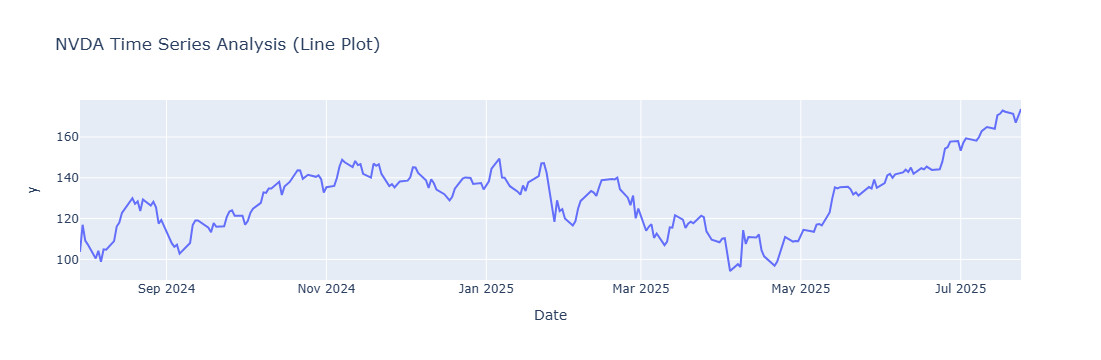

In [194]:
import plotly.express as px
figure = px.line(data, x=data.index, 
                 y=data["Close"].iloc[:, 0], 
                 title="NVDA Time Series Analysis (Line Plot)")
figure.show()

[*********************100%***********************]  1 of 1 completed


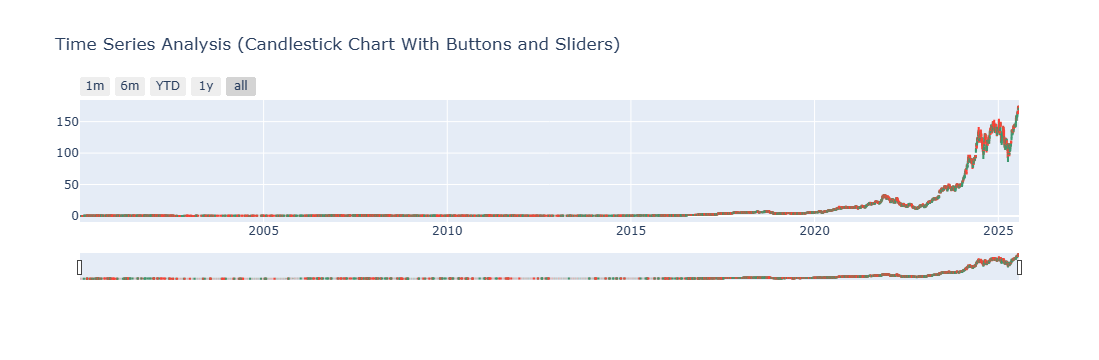

In [222]:
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

# Download data
data = yf.download(['NVDA'], start="2000-01-01", end="2025-12-31", auto_adjust=True)

# Extracting NVDA data
NVDAdata = data.xs('NVDA', axis=1, level=1)

# Ensuring index is datetime
NVDAdata.index = pd.to_datetime(NVDAdata.index)

# Ploting candlestick
fig = go.Figure(data=[go.Candlestick(
    x=NVDAdata.index,
    open=NVDAdata['Open'],
    high=NVDAdata['High'],
    low=NVDAdata['Low'],
    close=NVDAdata['Close']
)])

fig.update_layout(
    title="Time Series Analysis (Candlestick Chart With Buttons and Sliders)",
    xaxis=dict(
        rangeslider=dict(visible=True),
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        )
    )
)

fig.show()


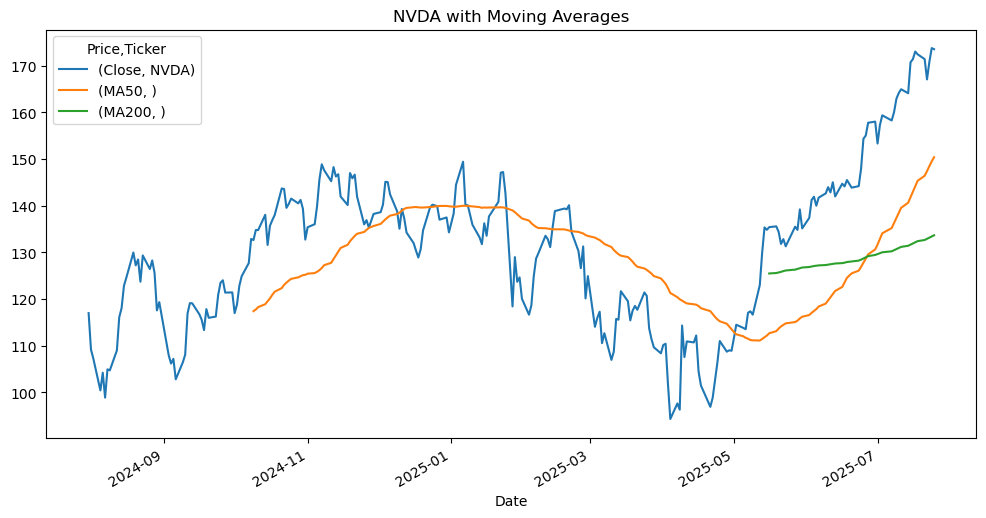

In [216]:
#NVDA Moving Averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

data[['Close', 'MA50', 'MA200']].plot(figsize=(12,6), title= 'NVDA with Moving Averages')
plt.show()


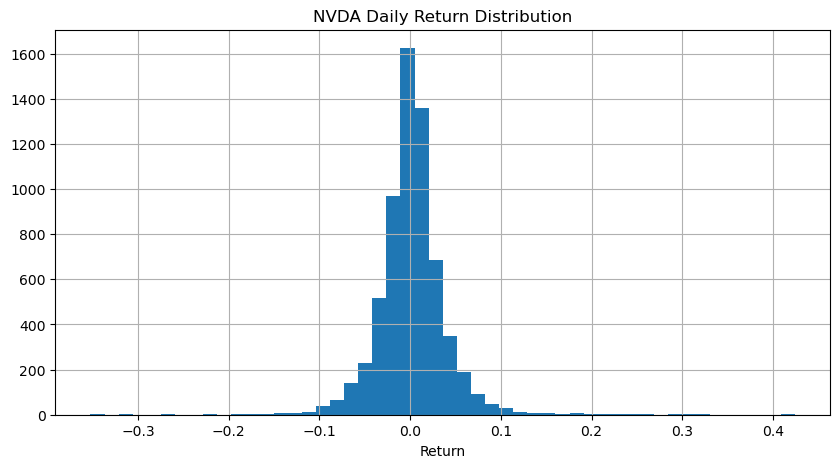

In [223]:
NVDAdata['Daily Return'] = NVDAdata['Close'].pct_change()

# Ploting histogram of returns
NVDAdata['Daily Return'].hist(bins=50, figsize=(10,5))
plt.title('NVDA Daily Return Distribution')
plt.xlabel('Return')
plt.show()

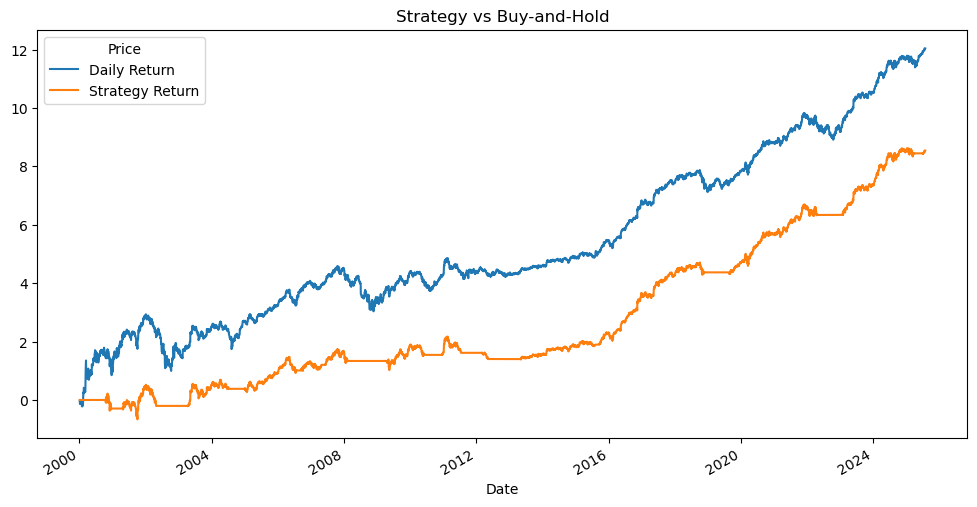

In [224]:
# Calculating daily returns first
NVDAdata['Daily Return'] = NVDAdata['Close'].pct_change()

# Adding moving averages
NVDAdata['MA50'] = NVDAdata['Close'].rolling(window=50).mean()
NVDAdata['MA200'] = NVDAdata['Close'].rolling(window=200).mean()

# Generating trading signals: 1 when MA50 > MA200
NVDAdata['Signal'] = 0
NVDAdata.loc[NVDAdata['MA50'] > NVDAdata['MA200'], 'Signal'] = 1

# Creating a Position column to shift signal forward (simulate acting on signal the next day)
NVDAdata['Position'] = NVDAdata['Signal'].shift(1)

# Strategy return = position * daily return
NVDAdata['Strategy Return'] = NVDAdata['Position'] * NVDAdata['Daily Return']

# Comparing strategy vs. buy-and-hold
NVDAdata[['Daily Return', 'Strategy Return']].cumsum().plot(figsize=(12,6), title='Strategy vs Buy-and-Hold')
plt.show()
